# Introduction

In this project, I will be examining data from a GitHub [survey](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) that contains information about Star Wars movies and characters. I will be attempting to determine which of the movies are the most popular and which characters are viewed the most favorably.

First, I will import the appropriate libraries and read in the dataset.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

# Cleaning the Dataset

Before I can begin my analysis, I will need to clean up some of the column names as well as a few of the column values in order to make the data easier to analyze. This process will be fairly short compared to most datasets as this dataset appears to be fairly easily digestible.

In [2]:
star_wars.head(3)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


There are 38 columns in this dataset, many of which have lengthy titles and therefore are more difficult to reference. In the next section, I will simplify the column names by renaming them.

## Changing the Column Names

In orde to more effectively rename the columns, I will take a closer look at the dataset's column names. 

In [3]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

Note that columns 4-9, 10-15, and 16-29 appear to consist of three separate groupings, which is why most of the columns are "Unnamed". First I will look at columns 4-9 in order to get some information on how to rename them.

In [4]:
star_wars[star_wars.columns[3:9]].head()

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
2,NaN,NaN,NaN,NaN,NaN,NaN
3,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN
4,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi


It is clear that each of the six columns represents one of the six Star Wars episodes. Furthermore, when a data entry contains the title of the film as it's value, this indicates the respondent has seen the movie. For now, I will rename the column names to "Seen 1", ... , "Seen 6" so they are easier to reference. Next, I will take a look at columns 10-15.

In [5]:
star_wars[star_wars.columns[9:15]].head()

,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi
1,3,2,1,4,5,6
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2,3,4,5,6
4,5,6,1,2,4,3


Each of these six columns also clearly represents one of the six movies. Each data entry contains a number that represents the rank each surveyee gave the movie in relation to the other episodes. I will rename the column names to "Rank 1",...,"Rank 6" so they are easier to reference. Finally, I will examine columns 16-29.

In [6]:
star_wars[star_wars.columns[15:29]].head(3)

,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Each of these columns represents one of 14 Star Wars characters, and the value of each data entry shows how favorably the surveyee views each one of these characters. I will rename each of the columns as the name of the character, so they will be names "Han Solo", ..., "Yoda". Now that the renaming structure has been established, I will rename all of the column names referenced. Additionally, I will rename most of the other columns so they are shorter and easier to reference.

In [7]:
star_wars = star_wars.rename(columns={
    "Have you seen any of the 6 films in the Star Wars franchise?": "Seen SW",
    "Do you consider yourself to be a fan of the Star Wars film franchise?": "SW Fan",
    "Which of the following Star Wars films have you seen? Please select all that apply.": "Seen 1",
    "Unnamed: 4": "Seen 2",
    "Unnamed: 5": "Seen 3",
    "Unnamed: 6": "Seen 4",
    "Unnamed: 7": "Seen 5",
    "Unnamed: 8": "Seen 6",
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "Rank 1",
    "Unnamed: 10": "Rank 2", 
    "Unnamed: 11": "Rank 3",
    "Unnamed: 12": "Rank 4",
    "Unnamed: 13": "Rank 5",
    "Unnamed: 14": "Rank 6",
    "Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.": "Han Solo",
    "Unnamed: 16": "Luke Skywalker", 
    "Unnamed: 17": "Princess Leia",
    "Unnamed: 18": "Anakin Skywalker",
    "Unnamed: 19": "Obi Wan Kenobi",
    "Unnamed: 20": "Emperor Palpatine",
    "Unnamed: 21": "Darth Vader",
    "Unnamed: 22": "Lando Calrissian",
    "Unnamed: 23": "Boba Fett",
    "Unnamed: 24": "C-3P0",
    "Unnamed: 25": "R2 D2",
    "Unnamed: 26": "Jar Jar Binks",
    "Unnamed: 27": "Padme Amidala",
    "Unnamed: 28": "Yoda",
    "Which character shot first?": "Who shot first?",
    "Are you familiar with the Expanded Universe?": "Knows EU",
    "Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦": "EU Fan",
    "Do you consider yourself to be a fan of the Star Trek franchise?": "Star Trek Fan",
    "Location (Census Region)": "Location"
})

star_wars.head(3)

,RespondentID,Seen SW,SW Fan,Seen 1,Seen 2,Seen 3,Seen 4,Seen 5,Seen 6,Rank 1,...,Yoda,Who shot first?,Knows EU,EU Fan,Star Trek Fan,Gender,Age,Household Income,Education,Location
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


Now that the column names are cleaned up, I will move on to the second part of my data cleaning, which consist of getting rid of rows and columns that don't aide my analysis.

## Getting Rid of Unnecessary Rows and Columns

Now that the columns have been renamed, note that the first row (which was created in order to organize the "Unnamed" column groups) is no longer needed. Because it was used for organization purposes, it is the only row that does not have a "RespondentID" as it does not contain a data entry, meaning that the RespondentID for that data entry is null. I will use this fact to drop that row from the dataset.

In [8]:
star_wars = star_wars[star_wars["RespondentID"].notnull()]
star_wars.head(3)

,RespondentID,Seen SW,SW Fan,Seen 1,Seen 2,Seen 3,Seen 4,Seen 5,Seen 6,Rank 1,...,Yoda,Who shot first?,Knows EU,EU Fan,Star Trek Fan,Gender,Age,Household Income,Education,Location
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


Now that the first row has been droped, note that the "RespondentID" column doesn't contain any useful information. I don't need to know the surveyee's identification numbers in order to analyze the rest of the data, so I'll drop that column from the dataset.

In [9]:
star_wars = star_wars.drop(columns={"RespondentID"})
star_wars.head(3)

,Seen SW,SW Fan,Seen 1,Seen 2,Seen 3,Seen 4,Seen 5,Seen 6,Rank 1,Rank 2,...,Yoda,Who shot first?,Knows EU,EU Fan,Star Trek Fan,Gender,Age,Household Income,Education,Location
1,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,2,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,2,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central


The next step of data cleaning will involve reorganizing the values within several of the columns into boolean values so they are easier to reference.

## Changing Values Within the Columns

If a surveyee has seen a given Star Wars episode, the appropriate "Seen 1-6" column will have the name of the movie as it's value. If the surveyee hasn't seen the movie, the column will have the value NaN. 

Instead of having the name of the movie indicate that a person has seen the film (it's lengthy), I will indicate that a surveyee has seen the film by replacing the movie name with the boolean value True. Otherwise, I will replace the NaN value with the boolean value False.

In [10]:
# Columns that need to be changed
episode_cols = ["Seen 1", "Seen 2", 
                "Seen 3", "Seen 4", 
                "Seen 5", "Seen 6"]

for ep in episode_cols:
    star_wars.loc[star_wars[ep].isnull(), ep] = False # Changes NaN's to False
    star_wars.loc[star_wars[ep] != False, ep] = True # Changes all other values (Yes's and movie title names) to True
    
star_wars.head()

,Seen SW,SW Fan,Seen 1,Seen 2,Seen 3,Seen 4,Seen 5,Seen 6,Rank 1,Rank 2,...,Yoda,Who shot first?,Knows EU,EU Fan,Star Trek Fan,Gender,Age,Household Income,Education,Location
1,Yes,Yes,True,True,True,True,True,True,3,2,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,No,NaN,False,False,False,False,False,False,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,Yes,No,True,True,True,False,False,False,1,2,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,Yes,Yes,True,True,True,True,True,True,5,6,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,Yes,Yes,True,True,True,True,True,True,5,4,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


Furthermore, the "Seen SW", "SW Fan", "Knows EU", "EU Fan", and "Star Trek Fan" columns have three possible value: Yes, No, or NaN. Yes indicates the question indicated in the column name is true, whereas No and NaN indicate the opposite. I can replace all Yes values with the boolean value True and all No and NaN values with the boolean value False.

In [11]:
yes_no = ["Seen SW", "SW Fan", "Knows EU", "EU Fan", "Star Trek Fan"]

for yn in yes_no:
    star_wars.loc[star_wars[yn] == "Yes", yn] = True # Changes Yes's to True
    star_wars.loc[star_wars[yn] != True, yn] = False # Changes all other values (No's and NaN) to False
    
star_wars.head(3)

,Seen SW,SW Fan,Seen 1,Seen 2,Seen 3,Seen 4,Seen 5,Seen 6,Rank 1,Rank 2,...,Yoda,Who shot first?,Knows EU,EU Fan,Star Trek Fan,Gender,Age,Household Income,Education,Location
1,True,True,True,True,True,True,True,True,3,2,...,Very favorably,I don't understand this question,True,False,False,Male,18-29,NaN,High school degree,South Atlantic
2,False,False,False,False,False,False,False,False,NaN,NaN,...,NaN,NaN,False,False,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,True,False,True,True,True,False,False,False,1,2,...,Unfamiliar (N/A),I don't understand this question,False,False,False,Male,18-29,"$0 - $24,999",High school degree,West North Central


## Converting Ranks from Integers to Floats

The final step to complete the data cleaning process will be to convert all of the "Rank 1-6" columns from integer values to float values. Integers represent whole numbers, making it more difficult to calculate precise averages, which I will calculate in later steps. Replacing them with float values will enable me to calculate more precise averages.

In [12]:
star_wars[star_wars.columns[8:14]] = star_wars[star_wars.columns[8:14]].astype(float)
star_wars[star_wars.columns[8:14]].head()

,Rank 1,Rank 2,Rank 3,Rank 4,Rank 5,Rank 6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0


Note that the non-null values in "Rank 1-6" are clearly float values, as they contain a tenth's place (integers are whole numbers). Now that I have finished cleaning up the dataset, I can move on to my analysis.

# Ranking the Episodes

Next, I will use the "Ranks 1-6" columns to calculate the average rank the surveyees gave each one of the films.

In [13]:
episode_ranks = round(star_wars[star_wars.columns[8:14]].mean(), 2)
episode_ranks

Rank 1    3.73
Rank 2    4.09
Rank 3    4.34
Rank 4    3.27
Rank 5    2.51
Rank 6    3.05
dtype: float64

It looks as though the fifth movie has the best rank whereas the third movie has the worst rank. I will compare these rankings to the table below, which details the critic's and audience's Rotten Tomatoes scores for each of the six movies.

| Episode                              | Critic's RT Score | Audience's RT Score |
| :------------------------------------| :---------------: | :-----------------: |
| [Episode I: The Phantom Menace](https://www.rottentomatoes.com/m/star_wars_episode_i_the_phantom_menace)        | 53%               | 59%                 |
| [Episode II: The Attack of the Clones](https://www.rottentomatoes.com/m/star_wars_episode_ii_attack_of_the_clones) | 65%               | 56%                 |
| [Episode III: Revenge of the Sith](https://www.rottentomatoes.com/m/star_wars_episode_iii_revenge_of_the_sith)     | 80%               | 66%                 |
| [Episode IV: A New Hope](https://www.rottentomatoes.com/m/star_wars)               | 92%               | 96%                 |
| [Episode V: The Empire Strikes Back](https://www.rottentomatoes.com/m/empire_strikes_back)   | 94%               | 97%                 |
| [Episode VI: Return of the Jedi](https://www.rottentomatoes.com/m/star_wars_episode_vi_return_of_the_jedi)       | 82%               | 94%                 |

Note that the original trilogy films (4-6) have incredibly high audience Rotten Tomato scores whereas the prequel trilogy films (1-3) have relatively mediocre audience Rotten Tomato scores. This would explain why the original trilogy rankings are generally better than the prequel trilogy rankings.

## Graphing the Episodes' Rankings

I will create a simple bar chart that shows each of the episodes and shows the movies' ranks in relation to one another. 

### Autolabel Function

First, I will create a simple function that will place a piece of text right above the top of each bar chart that shows each movie's rank. This will make it easy to compare the films' rankings to one another, even without a labeled y-axis. Additionally, I will be able to use this function on any other bar charts I might create later in my analysis.

In [14]:
def autolabel(bars, size=12, y=3):
    for bar in bars: # Loops through all bars in the chart
        
        height = bar.get_height() # Gets y coordinate of each individual bar
        
        if height >= 0:
            offset = (0,y) # Positions the number 3 positions above the bar if height is positive
        else:
            offset = (0,-(y+13)) # Positions the number 16 positions below the bar if height is negative (Jar Jar Binks in a later section)
        
        ax.annotate('{}'.format(round(height, 2)), # Formats the text to round to the nearest hundredth's place
        xy=(bar.get_x() + bar.get_width() / 2, height), # XY Position for placing text
        xytext=offset,
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=size)

### Graphing Star Wars Movie Rankings

Now that the autolabel function has been created, I can plot the bar chart of the Star Wars movie ranking below.

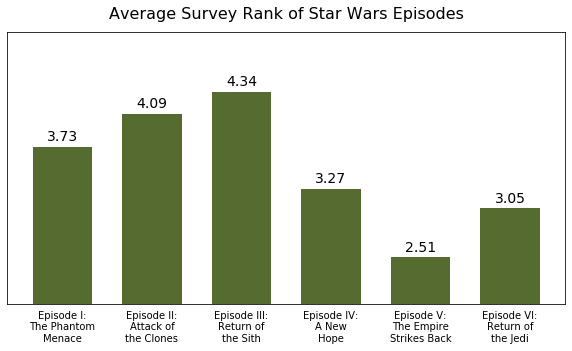

In [15]:
ind = np.arange(6) # Arranges the bars within the plot
width = (2/3) # Width of the bars

fig, ax = plt.subplots(figsize=(10, 5))
ep_rank = ax.bar(ind + (1/6), episode_ranks, width, color='DarkOliveGreen') 

ax.set_xticks(ind - (1/6) + width/2)
ax.set_ylim(ymin=2, ymax=5) # Smallest value is 2.51 and largest value is 4.34
ax.set_title('Average Survey Rank of Star Wars Episodes', fontsize=16, y=1.025)
# Renames the labels to the official names of the movies
ax.set_xticklabels(('Episode I:\nThe Phantom\nMenace', 'Episode II:\nAttack of\nthe Clones', 
                    'Episode III:\nReturn of\nthe Sith', 'Episode IV:\nA New\nHope', 
                    'Episode V:\nThe Empire\nStrikes Back', 'Episode VI:\nReturn of\nthe Jedi'))

# Gets rid of all xy coordinate tick marks and labels (unnecessary as autolabel will show official ratings)
ax.tick_params(axis="both", which="both", top=False, bottom=False, right=False, left=False, labelleft=False)

autolabel(ep_rank, 14)
plt.show()

## Percentage of Surveyees Who Have Seen Each Movie

Even though every surveyee who has seen Star Wars was required to rank all six films, note that the majority of survyees likley did not see all six of the films. Thus, they would not be able to accurately rank all six films in relation to one another. 

In order to get a more accurate ranking of the films, I will re-evaluate the rankings above by selecting only from surveyees who have seen all six films. First, I will create a bar chart that indicate the number of surveyees who have seen each film.

In [16]:
episode_seen = star_wars[star_wars.columns[2:8]].sum().astype(int)
episode_per = round(episode_seen / len(star_wars) * 100, 1)
episode_per

Seen 1    56.7
Seen 2    48.1
Seen 3    46.4
Seen 4    51.2
Seen 5    63.9
Seen 6    62.2
dtype: float64

Each film only has around a 45-65% probability that a surveyee has seen it. Below I will graph a bar chart demonstrating the percentage of surveyees who have seen a given film.

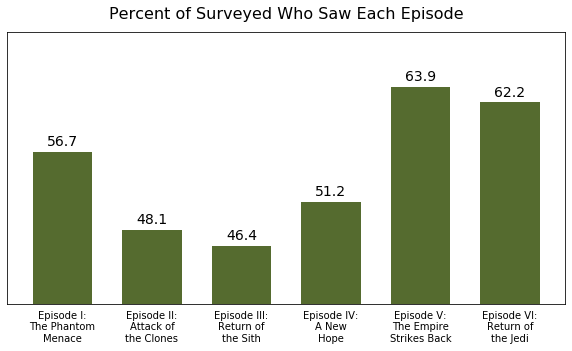

In [17]:
fig, ax = plt.subplots(figsize=(10, 5))
ep_per = ax.bar(ind + (1/6), episode_per, width, color='DarkOliveGreen')

ax.set_xticks(ind - (1/6) + width/2)
ax.set_ylim(ymin=40, ymax=70)
ax.set_title('Percent of Surveyed Who Saw Each Episode', fontsize=16, y=1.025)
ax.set_xticklabels(('Episode I:\nThe Phantom\nMenace', 'Episode II:\nAttack of\nthe Clones', 
                    'Episode III:\nReturn of\nthe Sith', 'Episode IV:\nA New\nHope', 
                    'Episode V:\nThe Empire\nStrikes Back', 'Episode VI:\nReturn of\nthe Jedi'))

ax.tick_params(axis="both", which="both", top=False, bottom=False, right=False, left=False, labelleft=False)

autolabel(ep_per, 14)
plt.show()

Note that Episode V (which was the highest ranked film) is also the film that was seen by the most number of viewers. This could lead to some seriously inaccurate data as it's possible that it's high ranking is partially due to the fact that it was seen by the more viewers than any other film. Although this is unlikely (note that it's RT score is also higher than that of all the other films), all future analysis will be conducted on a data subset that contains only surveyees who have seen all six films.

## Graphing the Episodes' Ranking by Users Who Have Seen All Six Films

In order to get a better indication of how surveyees rank all the films, I will select only from surveyees who have seen all six of the Star Wars films. First, I will create a data subset containing these surveyees.

In [18]:
seen_episodes = star_wars.columns[2:8] # The "Seen 1-6" columns

seen_all = star_wars # Set the seen_all subset to the full subset

# Goes through each episode and removes all entries that haven't seen each of the films
for ep in seen_episodes:
    seen_all = seen_all[seen_all[ep] == True]
    
print("Total number surveyed:", len(star_wars))
print("Total number surveyed who have seen a Star Wars movie:", len(star_wars[star_wars["Seen SW"] == True]))
print("Total Number Surveyed who have seen all six Star Wars movies:", len(seen_all))

Total number surveyed: 1186
Total number surveyed who have seen a Star Wars movie: 936
Total Number Surveyed who have seen all six Star Wars movies: 471


Only 471 of the 1186 survyees have seen all six Star Wars movies. However, this is still a large enough sample size to get an accurate approximation of how the average surveyee would rank each one of the films.

In [19]:
episode_ranks_new = round(seen_all[seen_all.columns[8:14]].mean(), 2)
episode_ranks_new

Rank 1    4.24
Rank 2    4.33
Rank 3    4.25
Rank 4    2.87
Rank 5    2.38
Rank 6    2.93
dtype: float64

It looks as though the order of the rankings has changed a bit. Although Episode V is still the highest ranking, now Episode II (rather that Episode III) is the lowest ranking (it also has the lowest audience Rotten Tomato score).

Also note that the episodes in the original trilogy (4-6) have a ranking in between 2.38 and 2.93, which is much lower than that of the episodes in the prequel trilogy (1-3), which are between 4.24 and 4.33. Since the Rotten Tomato scores are very high for the film in the original trilogy and are much lower for all the films in the prequel trilogy, this roughly matches expectations based on data from Rotten Tomatoes.

Next, I will create another bar chart indicating the episode rankings from this data subset. This bar chart will also contain the rankings from all surveyees (not only those who have seen all the episodes) so I can visualize how the rankings change when only selecting from surveyees who ahve seen all the episodes.

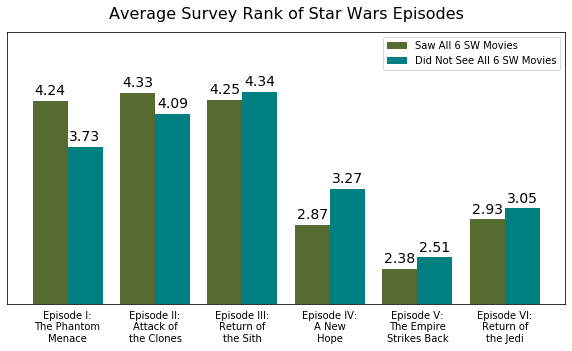

In [20]:
ind = np.arange(6)
width = (0.4)

fig, ax = plt.subplots(figsize=(10, 5))
ep_rank1 = ax.bar(ind - width/2 + 0.3, episode_ranks_new, width, label="Saw All 6 SW Movies", color='DarkOliveGreen')
ep_rank2 = ax.bar(ind + width/2 + 0.3, episode_ranks, width, label="Did Not See All 6 SW Movies", color='teal')

ax.legend()

ax.set_title('Average Survey Rank of Star Wars Episodes', fontsize=16, y=1.025)
ax.set_xticks(ind + width/2 + 0.1)
ax.set_ylim(ymin=2, ymax=5)
ax.tick_params(axis="both", which="both", top=False, bottom=False, right=False, left=False, labelleft=False)
ax.set_xticklabels(('Episode I:\nThe Phantom\nMenace', 'Episode II:\nAttack of\nthe Clones', 
                    'Episode III:\nReturn of\nthe Sith', 'Episode IV:\nA New\nHope', 
                    'Episode V:\nThe Empire\nStrikes Back', 'Episode VI:\nReturn of\nthe Jedi'))

autolabel(ep_rank1, 14)
autolabel(ep_rank2, 14)

plt.show()

Note that those surveyees who saw all six films tended to rank the original trilogy films far better (and prequel trilogy films worse) than surveyees who did not see all six films. I will use this data subset for the remainder of my analysis as I believe only surveyees who have seen all six films are able to accurately determine their preferences for each film.

## Favorite Episode

Next, I will determine which percentage of surveyees considered each film to be their favorite. First, I will find which percentage of surveyees prefered each episode.

In [21]:
ranks = seen_all.columns[8:14] # Columns indicating rank

fav_per = {}

for rank in ranks:
    key = "Percent " + rank.split()[1] # Converts "Rank 1" to "Percent 1" for every "Rank 1-6"
    decimal = len(seen_all.loc[seen_all[rank] == 1]) / len(seen_all) # Finds fraction of users who ranked each episode first
    fav_per[key] = round(decimal * 100, 2) # Coverts decimal into a percent and rounds to nearest hundredth

fav_per

{'Percent 1': 9.98,
 'Percent 2': 3.82,
 'Percent 3': 5.73,
 'Percent 4': 27.18,
 'Percent 5': 35.88,
 'Percent 6': 17.41}

The most popular favorite episode amongst users who have seen all six episodes is Episode V, with almost 36% of the votes, whereas the least common favorite episode is Episode II, with less than 4% of the votes. As expected, the original trilogy films are all more favorable than the prequel trilogy films are.

### Autolabel Function for Horizontal Bar Charts

Next, I will create a horizontal bar chart in order to graph these percentages. Before creating the bar chart, I will need to create a function that creates labels for horizontal bar charts in a very similar manner to the way in which the autolabel function creates labels for vertical bar charts.

In [22]:
def autolabel_horizontal(bars):
    for bar in bars: # Loops through all bars in the chart
        
        width = bar.get_width() # Gets x coordinate of each individual bar
        
        # Offset needs to be different for three digits than four digits so the label lines up nicely
        if width < 10:
            offset = (15, 0)
        else:
            offset = (20, 0)
        
        ax.annotate('{}'.format(round(width, 2)), # Formats the text to round to the nearest hundredth's place
        xy=(width, bar.get_y() + bar.get_height() / 3), # XY Position for placing text
        xytext=offset,
        textcoords="offset points",
        ha='center', va='bottom',
        fontsize=12)

### Graphing Favorite Episodes

Now that the autolabel_horizontal function has been created, I can create a horizontal bar chart of the surveyee's favorite episodes.

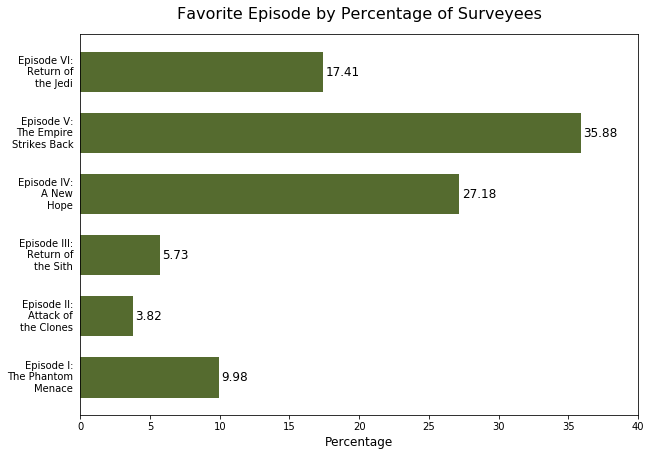

In [23]:
ind = np.arange(6)
height=(2/3)

fig, ax = plt.subplots(figsize=(10, 7))
fav = ax.barh(ind + (1/6), list(fav_per.values()), height, color='DarkOliveGreen')

ax.set_yticks(ind + width/2)
ax.set_xlim(xmin=0, xmax=40)
ax.set_xlabel("Percentage", fontsize=12)
ax.set_title('Favorite Episode by Percentage of Surveyees', fontsize=16, y=1.025)
ax.set_yticklabels(('Episode I:\nThe Phantom\nMenace', 'Episode II:\nAttack of\nthe Clones', 
                    'Episode III:\nReturn of\nthe Sith', 'Episode IV:\nA New\nHope', 
                    'Episode V:\nThe Empire\nStrikes Back', 'Episode VI:\nReturn of\nthe Jedi'))

ax.tick_params(axis="both", which="both", top=False, right=False, left=False)

autolabel_horizontal(fav)
plt.show()

The original trilogy films consist of over 80% of the total vote, indicating that they are vastly more favored than the prequel trilogy.

## Analyzing Factors that Influence Ranking Decisions

Next, I will analyze how other factors relate to ranking decisions. I will select three factors that could potentially influence how users rank the episodes. The three factors I will analyze are :
- Male vs. Female
- Star Wars Fans vs. Not Star Wars Fans
- Star Trek Fans vs. Not Star Trek Fans

First, I will need to select the data subsets associated with each of these categories and then calculate the mean value for each subset.

In [24]:
# Selecting subsets for males vs. females
males = seen_all[seen_all["Gender"] == "Male"]
male_rank = round(males[males.columns[8:14]].mean(), 2)

females = seen_all[seen_all["Gender"] == "Female"]
female_rank = round(females[females.columns[8:14]].mean(), 2)

# Selecting subsets for Star Wars Fans vs. not Star Wars Fans
sw_fans = seen_all[seen_all["SW Fan"] == True]
sw_fan_rank = round(sw_fans[sw_fans.columns[8:14]].mean(), 2)

not_sw_fans = seen_all[seen_all["SW Fan"] == False]
not_sw_fan_rank = round(not_sw_fans[not_sw_fans.columns[8:14]].mean(), 2)

# Selecting subsets for Star Trek Fans vs. not Star Trek Fans
st_fans = seen_all[seen_all["Star Trek Fan"] == True]
st_fan_rank = round(st_fans[st_fans.columns[8:14]].mean(), 2)

not_st_fans = seen_all[seen_all["Star Trek Fan"] == False]
not_st_fan_rank = round(not_st_fans[not_st_fans.columns[8:14]].mean(), 2)

# The means, legend labels, and plot titles respectively
groups = [[male_rank, female_rank], [sw_fan_rank, not_sw_fan_rank], [st_fan_rank, not_st_fan_rank]]
labels = [["Male", "Female"], ["Star Wars Fan", "Not Star Wars Fan"], ["Star Trek Fan", "Not Star Trek Fan"]]
titles = ["Gender", "Star Wars Fan", "Star Trek Fan"]

Now I can graph how these factors affect the episode rankings.

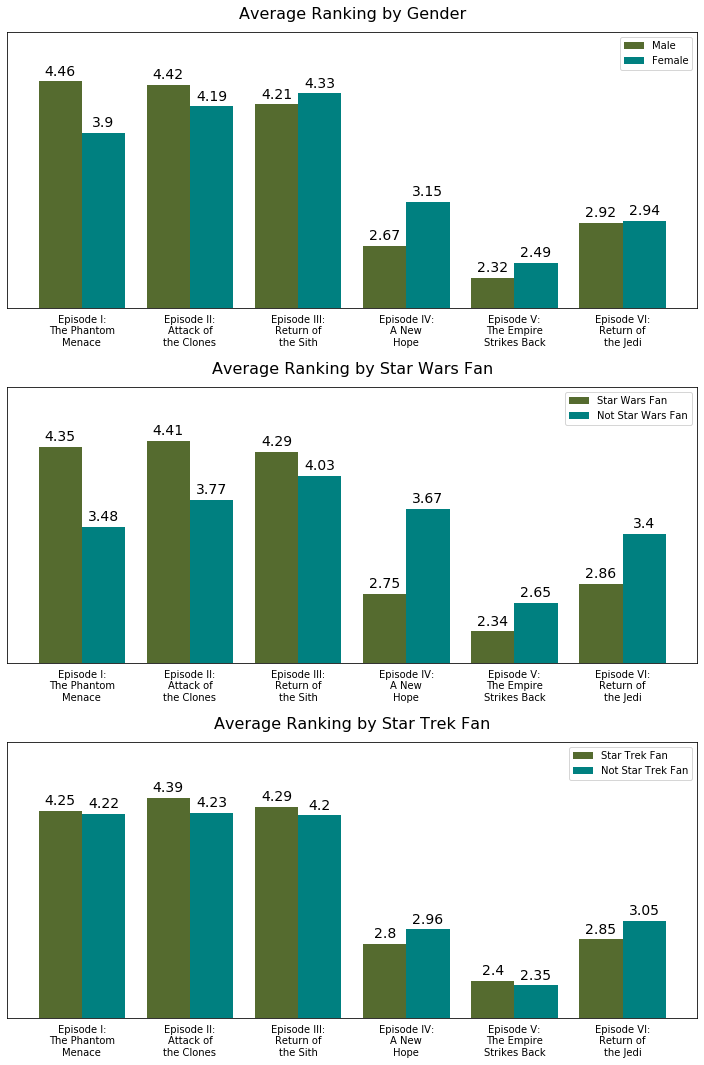

In [25]:
ind = np.arange(6)
width = (0.4)

fig = plt.figure(figsize=(10, 15))

for sp in range(3):
    ax = fig.add_subplot(3, 1, sp + 1)

    value1 = ax.bar(ind - width/2 + 0.3, groups[sp][0], width, label=labels[sp][0], color="DarkOliveGreen")
    value2 = ax.bar(ind + width/2 + 0.3, groups[sp][1], width, label=labels[sp][1], color="teal")
    
    ax.set_title("Average Ranking by " + titles[sp], fontsize=16, y=1.025)
    ax.legend()
    
    ax.set_ylim(ymin=2, ymax=5)
    
    ax.tick_params(axis="both", which="both", top=False, bottom=False, right=False, left=False, labelleft=False)
    ax.set_xticks(ind + width/2 + 0.1)
    ax.set_xticklabels(('Episode I:\nThe Phantom\nMenace', 'Episode II:\nAttack of\nthe Clones', 
                        'Episode III:\nReturn of\nthe Sith', 'Episode IV:\nA New\nHope', 
                        'Episode V:\nThe Empire\nStrikes Back', 'Episode VI:\nReturn of\nthe Jedi')
                      )

    autolabel(value1, 14)
    autolabel(value2, 14)
    
fig.tight_layout(pad=1.5)
plt.show()

Although both men and women prefer the original trilogy films to the prequel trilogy, men are more likely to rank the original trilogy films more favorably. It's worth noting that women are much more likely to prefer "The Phantom Menace" and are much less likely to prefer "A New Hope".

Similarly, fans of Star Wars are much more likely to rank the original trilogy films more favorably than surveyees who aren't fans are. In fact, surveyees who aren't fans of Star Wars rate "Return of the Jedi" Nevertheless, they still both rank "The Empire Strikes Back" as the greatest of the Star Wars films.

There doesn't appear to be too much of a difference between the preferences of fans of Star Trek and people who aren't fans of Star Trek. This makes decent sense as the two series are not related and although there is a somewhat well known Star Wars vs. Star Trek rivalry, it's reasonable to assume that the vast majority of Star Trek fans do not base their favorability towards Star Wars on this rivalry.

# Most Favorable Star Wars Characters

Next, I will examine how favorably the average surveyee views characters within the Star Wars universe. First, let's take a look at the first couple of rows of columns 15-28, which show how favorably each Star Wars character is viewed by each surveyee.

In [26]:
star_wars[star_wars.columns[14:28]].head(3)

,Han Solo,Luke Skywalker,Princess Leia,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)


## Quantifying the Favorability of Each Character

Since the first five columns don't give me much information regarding the possible values regarding favorability, I will take a closer look at all the values for the first character on the list, Han Solo, using the value_counts method.

In [27]:
star_wars["Han Solo"].value_counts()

Very favorably                                 610
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Name: Han Solo, dtype: int64

It appears as though there are six different possible values for each of the character columns. In order to calculate an average favorability for each of the characters within the dataset, I will assign a numeric score to each of the possible values and then calculate the average score for each character. Here are the possible scores:
- "Very favorably" = 10
- "Somewhat favorably" = 5
- "Neither favorably nor unfavorably (neutral)" = 0
- "Unfamiliar (N/A)" = 0
- "Somewhat unfavorably" = -5
- "Very unfavorably" = -10

The function favorability_ranker will take a dataset and a character name and find the average score for the character using this scoring system. It will also round the value to the nearest hundredth's place.

In [28]:
def favorability_ranker(dataset, character):
    char = dataset[character] # Selects the column indicated by the name of the character
    
    # Mapping the possible values
    favorability_map = {"Very favorably": 10,
                        "Somewhat favorably": 5,
                        "Neither favorably nor unfavorably (neutral)": 0,
                        "Unfamiliar (N/A)": 0,
                        "Somewhat unfavorably": -5,
                        "Very unfavorably": -10
                    }
    
    return round(char.map(favorability_map).mean(), 2)

The character_ranks function will use the favorability_ranker function and apply it to all characters within a given dataset and then will return a pandas dataframe ranking all characters based on their favorability rating.

In [29]:
popular_chars = []

def character_ranks(dataset, name):
    
    favorability = []
    favorability_sorted = []
    
    # Loops through all the Star Wars characters and determines the average score
    for char in dataset.columns[14:28]:
        favor = favorability_ranker(dataset, char)
        favorability.append([favor, char]) # Values reversed for later sorting
    
    favorability = sorted(favorability, reverse=True) # Sorting values based on descending 
    
    # Reverses the order to make the data entries more readable
    for char in favorability:
        favorability_sorted.append([char[1], char[0]])
        
    return pd.DataFrame.from_records(favorability_sorted, columns=["Character", "Favorability ({})".format(name)])

Next I will use the character_ranks function on three data subsets:
- People who have seen all Star Wars films
- Fans who have seen all Star Wars films
- Non-fans who have seen all Star Wars films

I will merge the three data subsets together to get a single chart that contains the average character ratings of all three subsets.

In [30]:
char_rating_seen = character_ranks(seen_all, "Seen All SW")
char_rating_fans = character_ranks(sw_fans, "SW Fans")
char_rating_not_fans = character_ranks(not_sw_fans, "Not SW Fans")

In [31]:
char_rating = pd.merge(char_rating_seen, char_rating_fans, how='left')
char_rating = pd.merge(char_rating, char_rating_not_fans, how='left')
char_rating

,Character,Favorability (Seen All SW),Favorability (SW Fans),Favorability (Not SW Fans)
0,Han Solo,8.93,9.25,6.75
1,Yoda,8.66,8.85,7.33
2,Obi Wan Kenobi,8.58,8.85,6.69
3,Princess Leia,8.21,8.45,6.53
4,Luke Skywalker,8.21,8.46,6.44
5,R2 D2,8.02,8.18,6.92
6,C-3P0,7.04,7.29,5.34
7,Anakin Skywalker,3.94,4.07,3.05
8,Darth Vader,3.56,3.93,1.02
9,Padme Amidala,3.40,3.39,3.47


Han Solo and Yoda are the most favorable characters, whereas Jar Jar Binks and Emperor Palpatine are the least favorable. Note that Jar Jar Binks is the only character who is considered unfavorable by the majority of the people who have seen all six Star Wars movies. Also note that non-fans rate most of the characters much less favorably than fans do, the only exceptions being Padme Amidala (slightly) and Jar Jar Binks.

## Graphing the Favorability of Each Character

As the final part of my analysis, I will be graphing the favorability of each character for each data subset. Note that I will have to create a new pandas dataframe that finds the mean for the favorability of each of the characters because the character_ranks dataframe is sorted and I want to use an unsorted dataframe for my bar chart. The char_ranks function will take in a dataset and return the mean favorability for each of the characters.

In [32]:
def char_ranks(dataset):
    new_dataset = dataset
    
    favorability_map = {"Very favorably": 10,
                        "Somewhat favorably": 5,
                        "Neither favorably nor unfavorably (neutral)": 0,
                        "Unfamiliar (N/A)": 0,
                        "Somewhat unfavorably": -5,
                        "Very unfavorably": -10
                       }
    
    for num in range(14, 28):
        new_dataset[new_dataset.columns[num]] = new_dataset[new_dataset.columns[num]].map(favorability_map)
        
    return new_dataset[new_dataset.columns[14:28]].mean()

In [33]:
rating_seen = char_ranks(seen_all)
rating_fans = char_ranks(sw_fans)
rating_not_fans = char_ranks(not_sw_fans)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


Now that the data subsets have been created, I can build the bar graph displaying the findings detailed above.

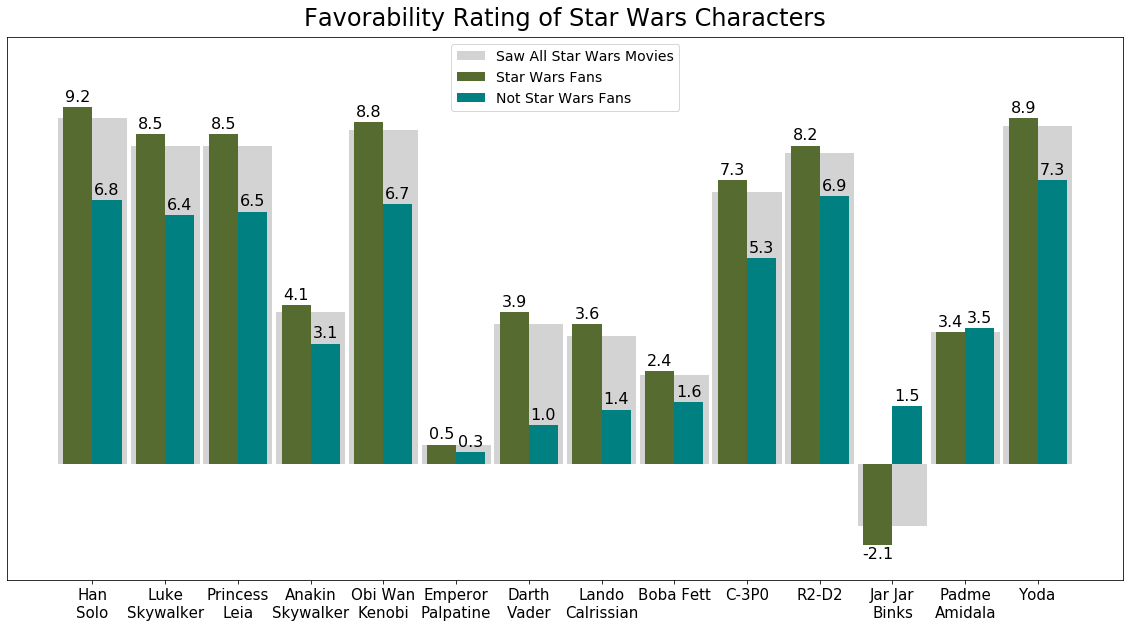

In [34]:
ind = np.arange(14)
width = (0.4)

fig, ax = plt.subplots(figsize=(20, 10))

seen = ax.bar(ind, round(rating_seen, 1), 0.95, label="Saw All Star Wars Movies", color='lightgrey')
fans = ax.bar(ind - width/2, round(rating_fans, 1), width, label="Star Wars Fans", color='DarkOliveGreen')
not_fans = ax.bar(ind + width/2, round(rating_not_fans, 1), width, label="Not Star Wars Fans", color='teal')

ax.legend(loc="upper center", fontsize=14)

ax.set_title('Favorability Rating of Star Wars Characters', fontsize=24, y=1.01)
ax.set_xticks(ind)
ax.set_ylim(ymin=-3, ymax=11)
ax.tick_params(axis="both", which="both", top=False, right=False, left=False, labelleft=False)
ax.set_xticklabels(("Han\nSolo", "Luke\nSkywalker", "Princess\nLeia", "Anakin\nSkywalker",
                    "Obi Wan\nKenobi", "Emperor\nPalpatine", "Darth\nVader", 'Lando\nCalrissian',
                    'Boba Fett', 'C-3P0', 'R2-D2', 'Jar Jar\nBinks', 'Padme\nAmidala', 'Yoda'), fontsize=15)

autolabel(fans, 16)
autolabel(not_fans, 16)

plt.show()

As noted previously, Star Wars fans view all of the characters (except for Jar Jar and Padme) more favorably than surveyees who are not Star Wars fans do. This is not surprising, as it stands to reason that Star Wars fans would view Star Wars characters very favorably due to their overall love for the series. Considering that Jar Jar and Padme are fairly disliked characters (many fans aren't fond of the prequel trilogy), it's understandable that they were rated less favorably.

It's also interesting to note that six out of seven of the less-favorable characters (under a score of five) are either original trilogy villians (Emperor Palpatine, Darth Vader, and Boba Fett) or prequel trilogy heroes (Anakin, Jar Jar, and Padme). Lando, the only exception, is an antihero who betrays his friend Han Solo (the most favorable character) but eventually redeems himself by rescuing him. This betrayal likley lowered his favorability in the eyes of the surveyees.

Considering my analysis has concluded that most surveyees prefer the original trilogy over the prequel trilogy, it's likely that the prequel trilogy heroes are disliked because they are poorly written characters (the Anakin-Padme romance is widely criticized, Anakin eventually becomes the villian Darth Vader, and Jar Jar is considered annoying). In contrast, considering that Emperor Palpatine, Darth Vader, and Boba Fett are widely regarded as intriguing villians, they are likely rated low due to their nefarious deeds (everyone loves a hero), not because they are poorly-written characters. 

Note that heroes from the original trilogy (Han, Luke, and Leia) and heroes from both trilogies (Obi Wan, C-3P0, R2-D2, and Yoda) are viewed much more fondly than heroes from the prequel trilogy. This is likely due to the overall unfavorability of the prequel trilogy in relation to the original trilogy.

# Results

According to all subsets of the data (regardless of gender, fanship, or whether the user has seen all six films) and  Rotten Tomatoes critics and audiences alike, Episode V: The Empire Strikes back is the best Star Wars film. It also is the most watched film (63.9% of surveyees have seen it) and the favorite film (35.88% of surveyees rank it as their favorite film).

According to Star Wars fans and Rotten Tomatoes audiences, Episode II: Attack of the Clones is considered to be the worst, although all the prequel trilogy films are ranked fairly poorly. It is also the least likely to be a surveyees favorite film (only 3.82% of surveyees rank it as their favorite film.

Over 80% of surveyees rank a film in the original trilogy as their favorite film, clearly indicating that the original trilogy is vastly more popular than the sequel trilogy. The Rotten Tomato scores amongst audiences for original trilogy films are all rated 94% or above whereas they are all rated 66% or below for the prequel trilogy films.

Men and Star Wars fans are more likely than women and surveyees who aren't fans of Star Wars to prefer the original trilogy over the prequel trilogy.

The original trilogy heroes are viewed much more favorably than the prequel trilogy heroes, and one prequel trilogy hero (Jar Jar Binks) is even viewed unfavorably amongst the majority of surveyees.

If I were to summarize this analysis into a single phrase, it would be "The original trilogy is better than the prequel trilogy by every available measure". Now, the sequel trilogy is worse than both, but I'll save that analysis for another project.